In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

### Data Extraction

In [2]:
df=pd.read_csv("CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
print("Number of rows: ",df.shape[0], "\n""Number of columns: ",df.shape[1])

Number of rows:  8950 
Number of columns:  18


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
def metrics_val(col):
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    print("Below are the metrics for ",col,":")
    print("Minimum value : ",df[col].min())
    print("Maximum value : ",df[col].max())
    print("First Quartile - ", Q1, "Median - ", Q2, "Third Quartile - ", Q3)
    IQR = Q3-Q1
    print("Inter-quatile Region - ",IQR, "\n\n")

for col in df.columns:
    if(col != 'CUST_ID'):
        metrics_val(col)

Below are the metrics for  BALANCE :
Minimum value :  0.0
Maximum value :  19043.13856
First Quartile -  128.2819155 Median -  873.385231 Third Quartile -  2054.1400355
Inter-quatile Region -  1925.85812 


Below are the metrics for  BALANCE_FREQUENCY :
Minimum value :  0.0
Maximum value :  1.0
First Quartile -  0.888889 Median -  1.0 Third Quartile -  1.0
Inter-quatile Region -  0.11111099999999996 


Below are the metrics for  PURCHASES :
Minimum value :  0.0
Maximum value :  49039.57
First Quartile -  39.635 Median -  361.28 Third Quartile -  1110.13
Inter-quatile Region -  1070.4950000000001 


Below are the metrics for  ONEOFF_PURCHASES :
Minimum value :  0.0
Maximum value :  40761.25
First Quartile -  0.0 Median -  38.0 Third Quartile -  577.405
Inter-quatile Region -  577.405 


Below are the metrics for  INSTALLMENTS_PURCHASES :
Minimum value :  0.0
Maximum value :  22500.0
First Quartile -  0.0 Median -  89.0 Third Quartile -  468.6375
Inter-quatile Region -  468.6375 


Below

In [8]:
duplicates = df.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


### Imputation of missing values

In [9]:
(df=='?').sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

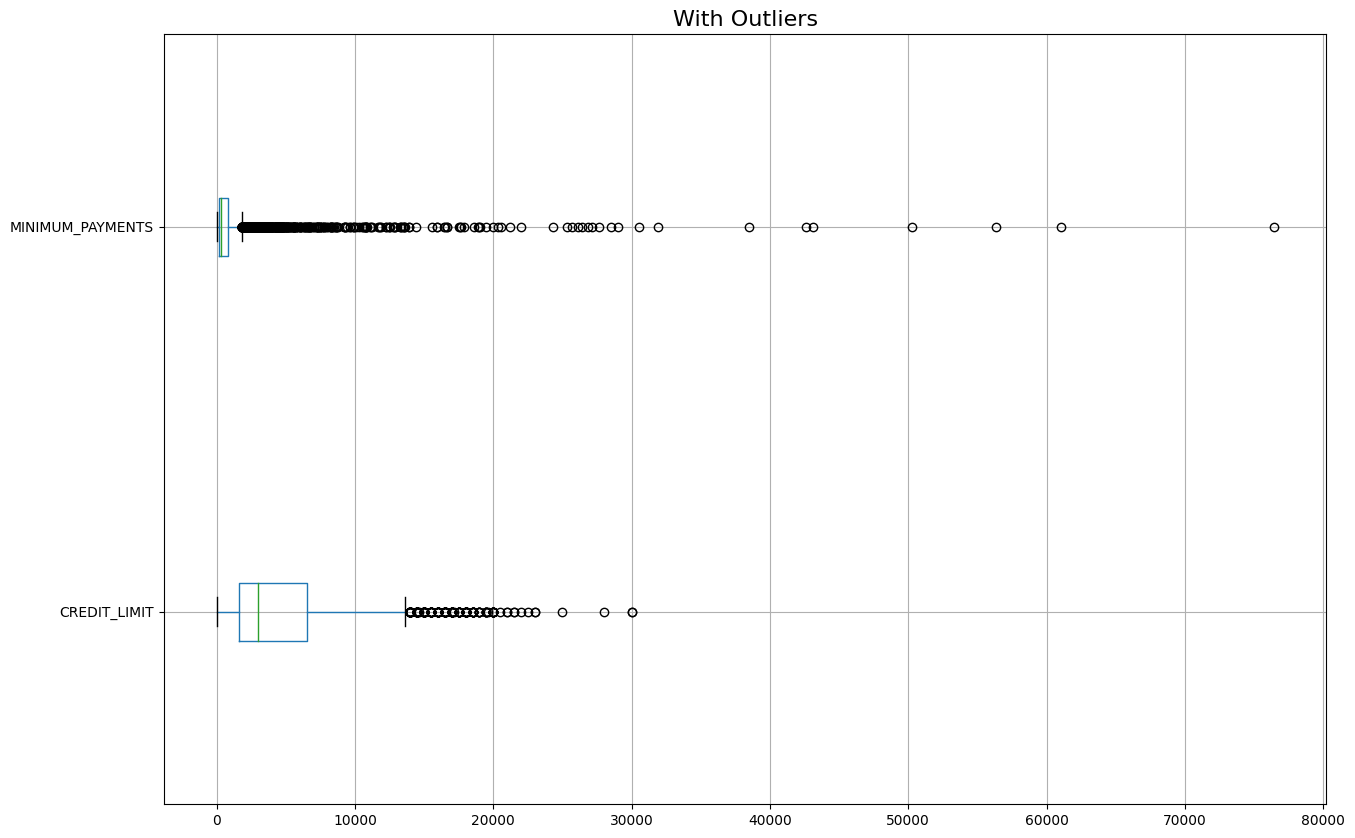

In [11]:
num = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']
plt.figure(figsize=(15,10))
df[num].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

Both the variables have possible outliers and hence median would be used for imputaiton

In [12]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Dropping CUST_ID column

CUST_ID is an object data type column and it is unique value, there is no need of it in clustering, so we will drop it.

In [13]:
df = df.drop('CUST_ID',axis = 1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
cols = df.columns

### Data Visualization

#### Univariate Analysis

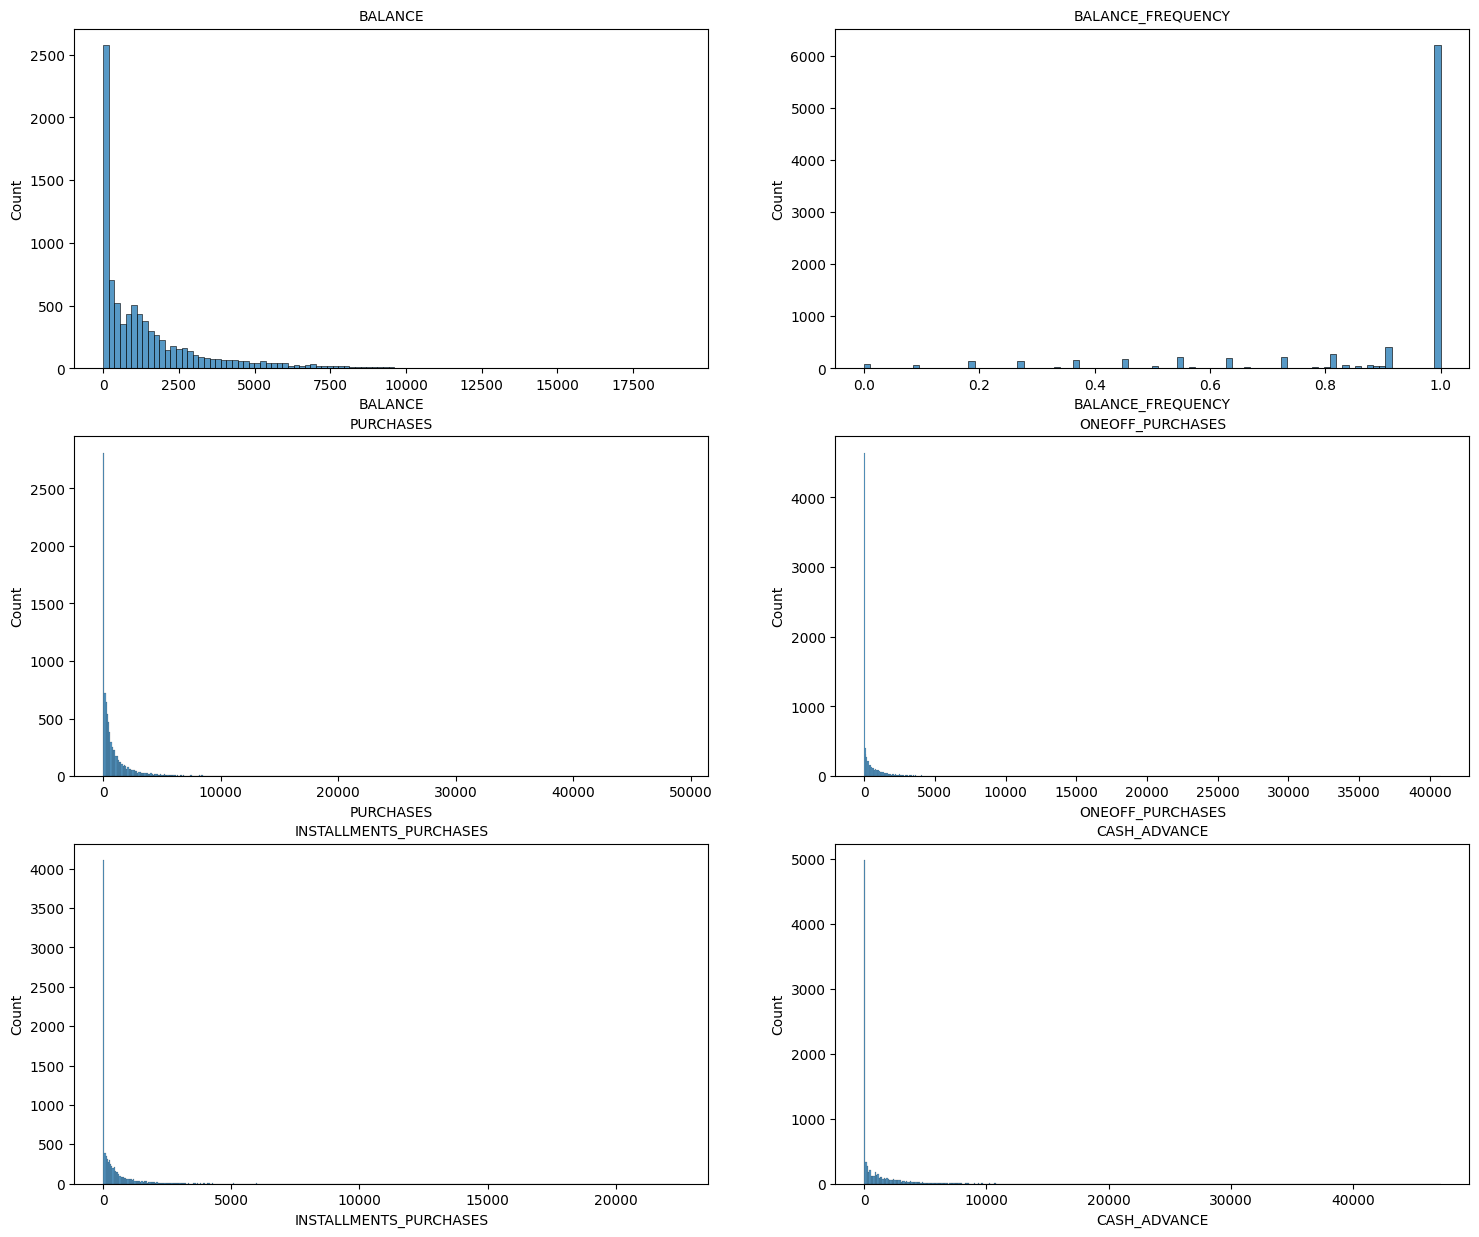

In [15]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(18,15)

a = sns.histplot(x=df[cols[0]] , ax=axes[0][0])
a.set_title(cols[0],fontsize=10)

a = sns.histplot(x=df[cols[1]] , ax=axes[0][1])
a.set_title(cols[1],fontsize=10)

a = sns.histplot(x=df[cols[2]] , ax=axes[1][0])
a.set_title(cols[2],fontsize=10)

a = sns.histplot(x=df[cols[3]] , ax=axes[1][1])
a.set_title(cols[3],fontsize=10)

a = sns.histplot(x=df[cols[4]] , ax=axes[2][0])
a.set_title(cols[4],fontsize=10)

a = sns.histplot(x=df[cols[5]] , ax=axes[2][1])
a.set_title(cols[5],fontsize=10)

plt.show()

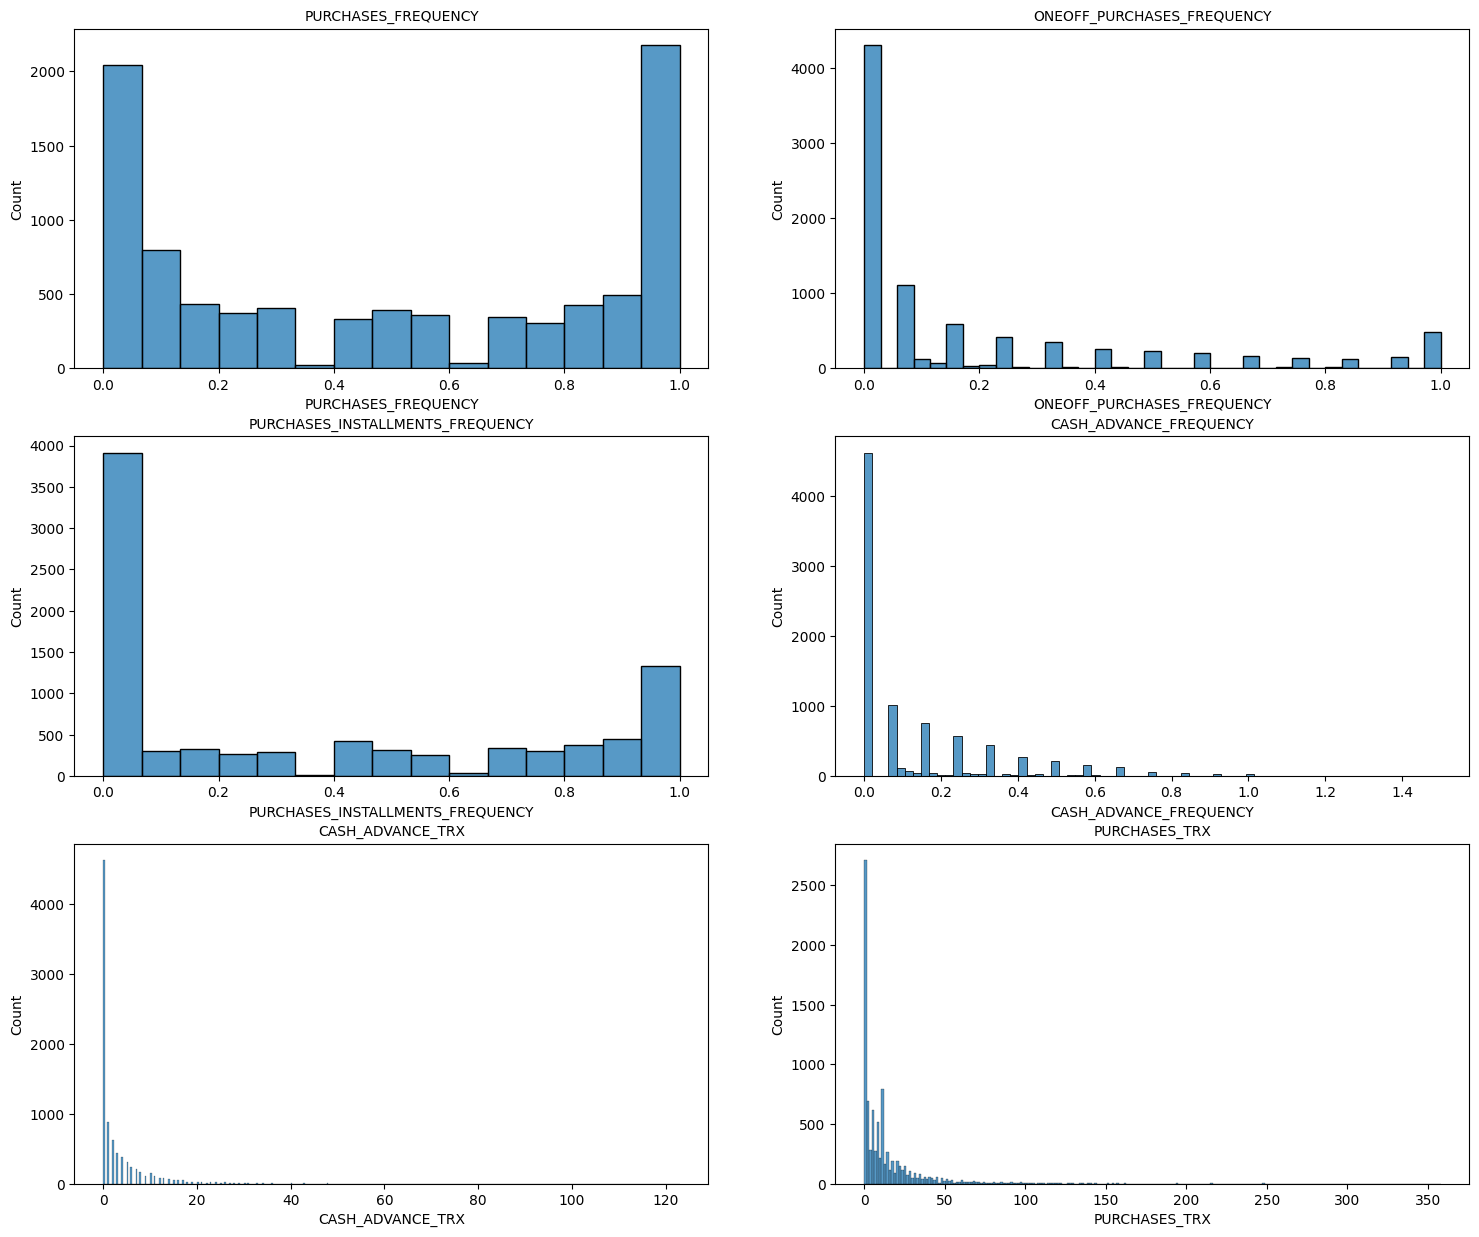

In [16]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(18,15)

a = sns.histplot(x=df[cols[6]] , ax=axes[0][0])
a.set_title(cols[6],fontsize=10)

a = sns.histplot(x=df[cols[7]] , ax=axes[0][1])
a.set_title(cols[7],fontsize=10)

a = sns.histplot(x=df[cols[8]] , ax=axes[1][0])
a.set_title(cols[8],fontsize=10)

a = sns.histplot(x=df[cols[9]] , ax=axes[1][1])
a.set_title(cols[9],fontsize=10)

a = sns.histplot(x=df[cols[10]] , ax=axes[2][0])
a.set_title(cols[10],fontsize=10)

a = sns.histplot(x=df[cols[11]] , ax=axes[2][1])
a.set_title(cols[11],fontsize=10)

plt.show()

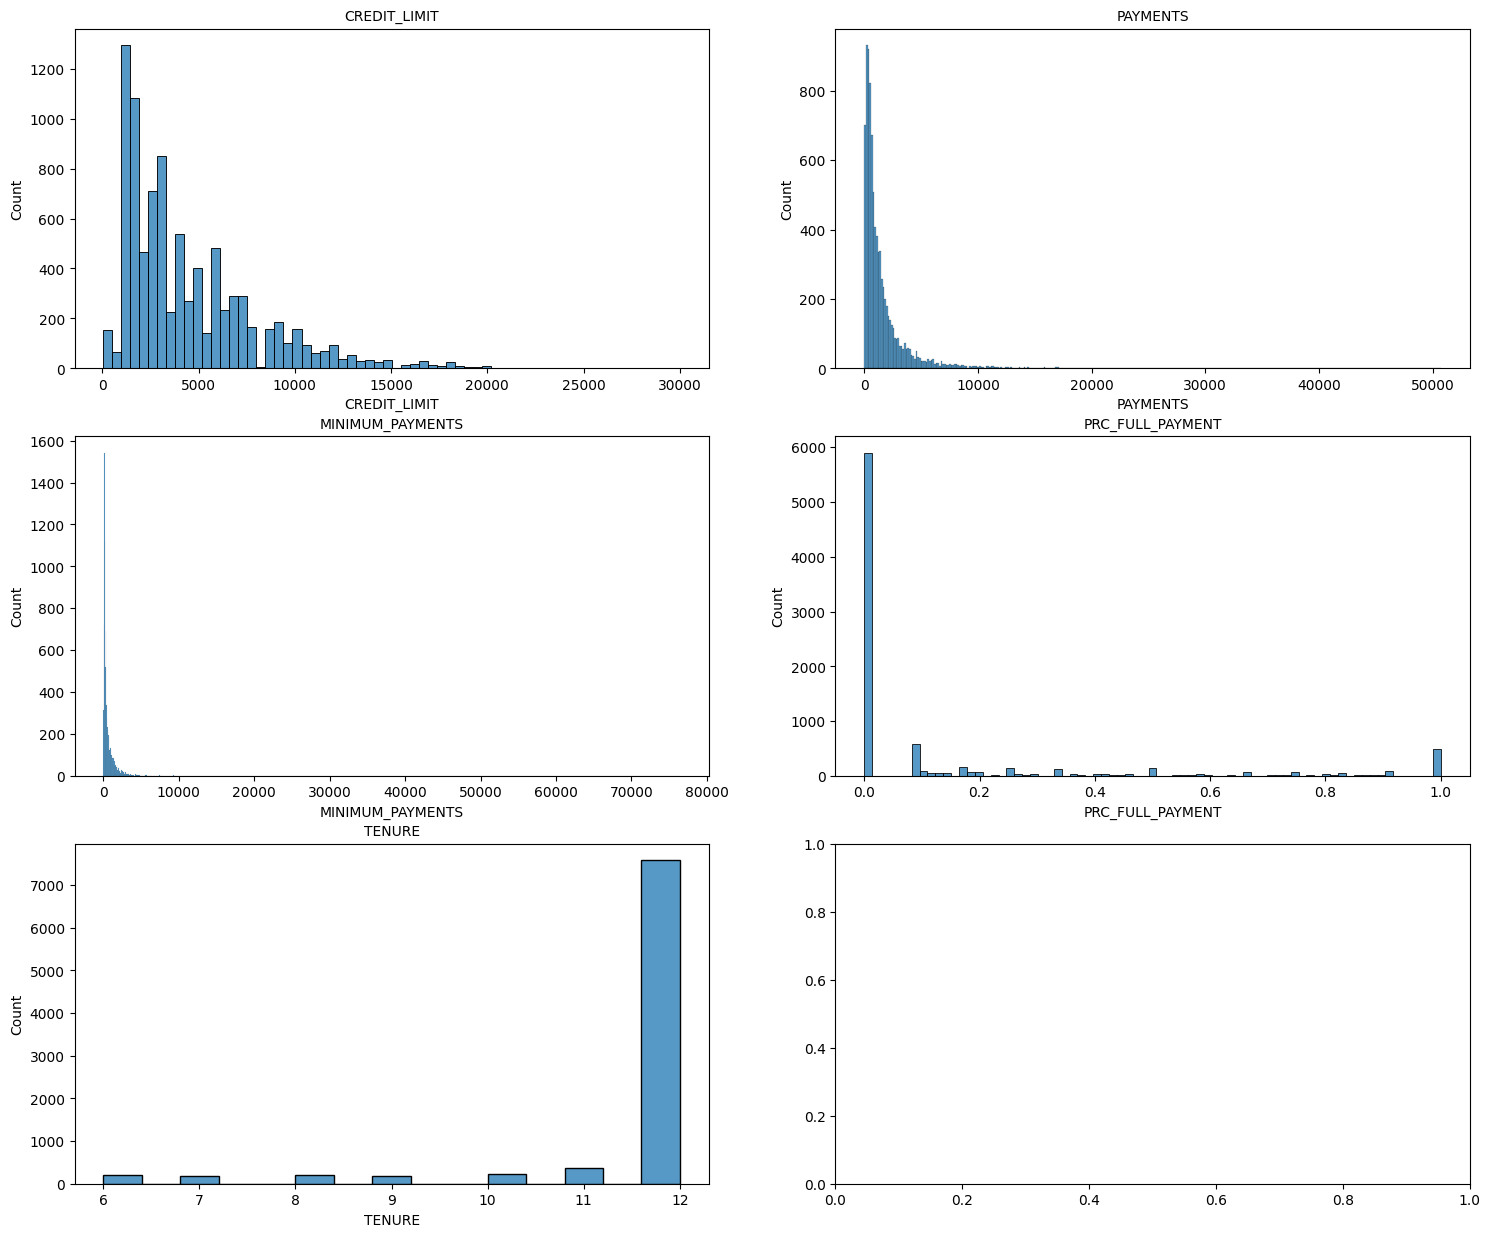

In [17]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(18,15)

a = sns.histplot(x=df[cols[12]] , ax=axes[0][0])
a.set_title(cols[12],fontsize=10)

a = sns.histplot(x=df[cols[13]] , ax=axes[0][1])
a.set_title(cols[13],fontsize=10)

a = sns.histplot(x=df[cols[14]] , ax=axes[1][0])
a.set_title(cols[14],fontsize=10)

a = sns.histplot(x=df[cols[15]] , ax=axes[1][1])
a.set_title(cols[15],fontsize=10)

a = sns.histplot(x=df[cols[16]] , ax=axes[2][0])
a.set_title(cols[16],fontsize=10)

plt.show()

Insights from Histogram:
- Tenure of credit card service is mostly 12 months for the customers
- Account balance amount is maintained as zero by most of the customers while the account balance update frequency is higher for most of the users.
- We have almost equal amount of customers who purchase more frequently and who purchase more rarely using the credit card.
- Most of the customers doesn't prefer to make purchases in one-go.
- Frequency of purchases through installments and advance payments are very less among most of the users.
- Credit limit for most of the customers falls within the range of 1000 to 3000
- Payments done by the customers is predominantly in the range of 500 to 2000

#### Bivariate Analysis

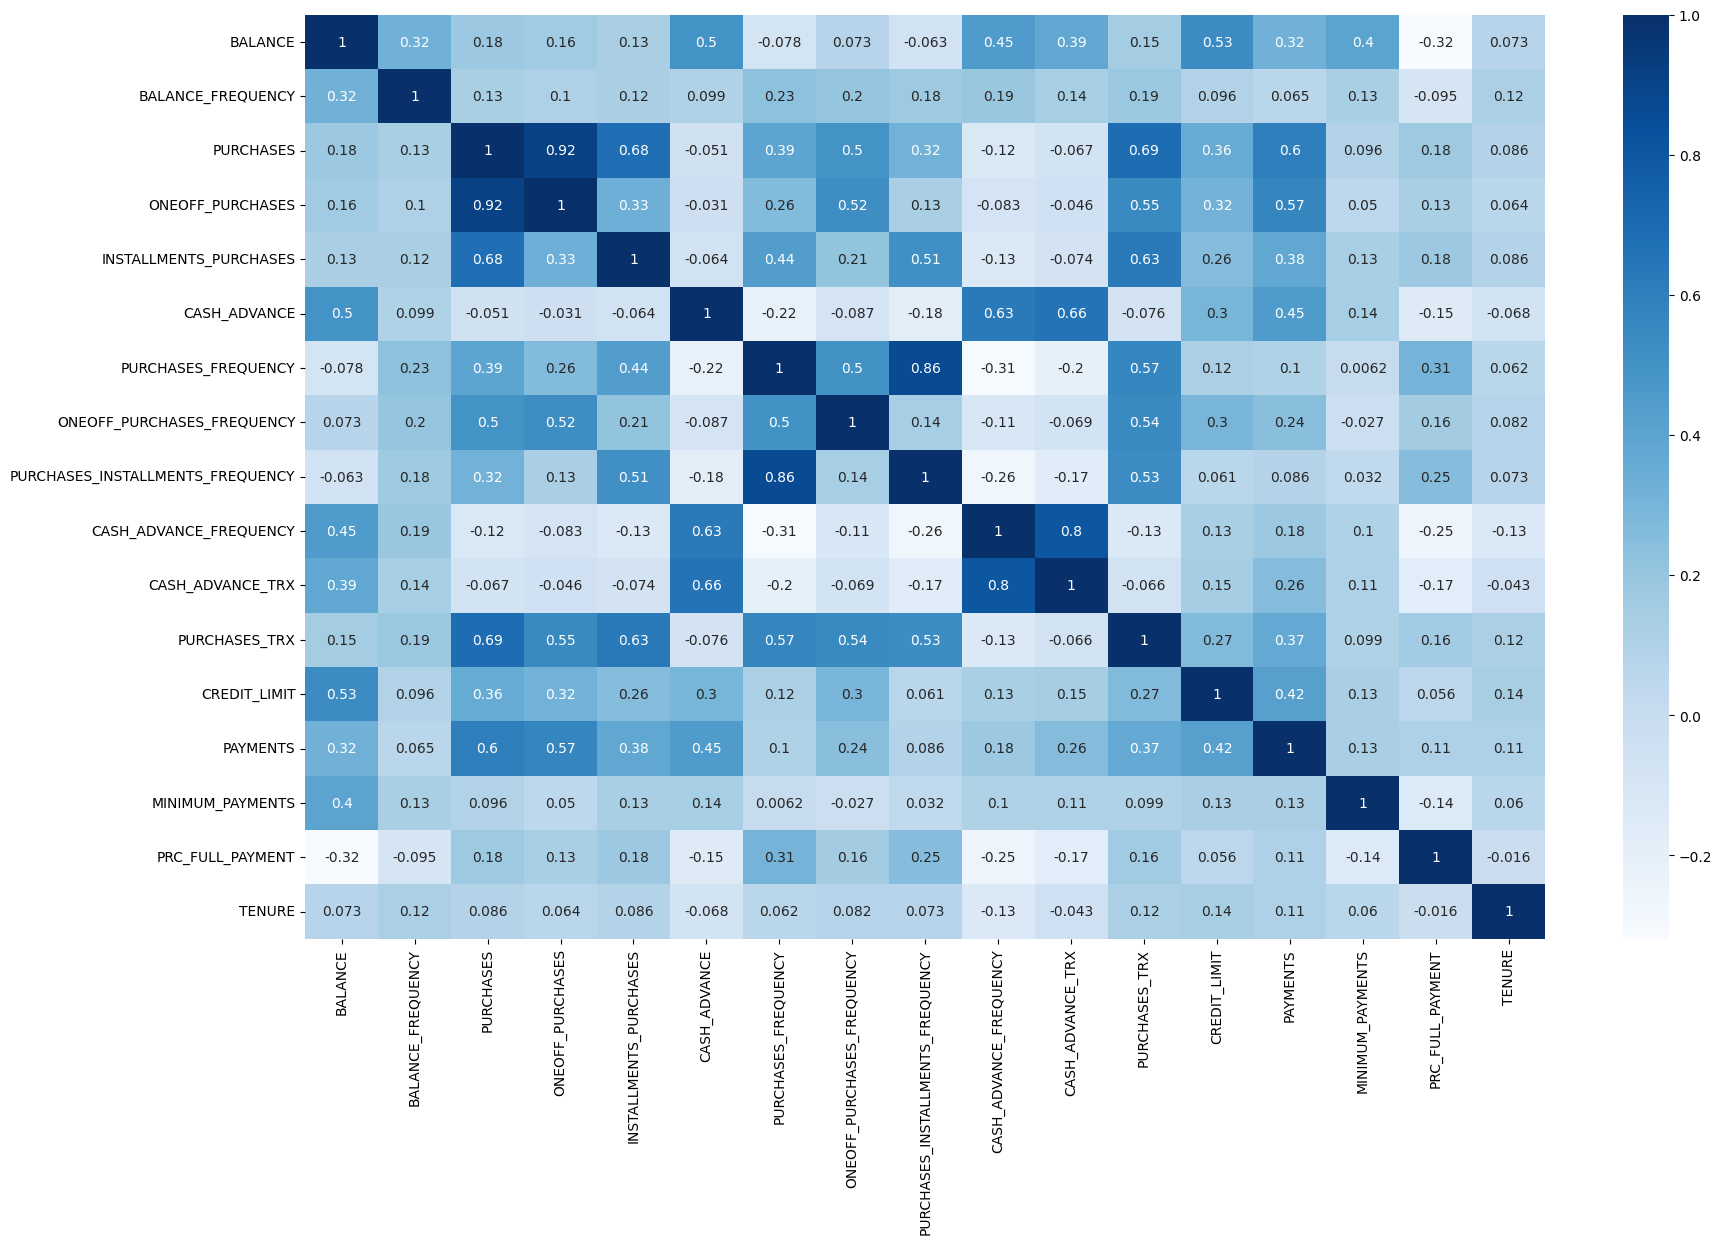

In [18]:
plt.subplots(figsize = (20,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

- We can notice that there is higher correlation between purchases and oneoff_purchases. 
- Second highly correlated features are purchase_installment_frequency and purchase frequency. 
- Also we can see more correlation between cash_advance_frequency and cash_advance_trx

#### Multivariate Analysis

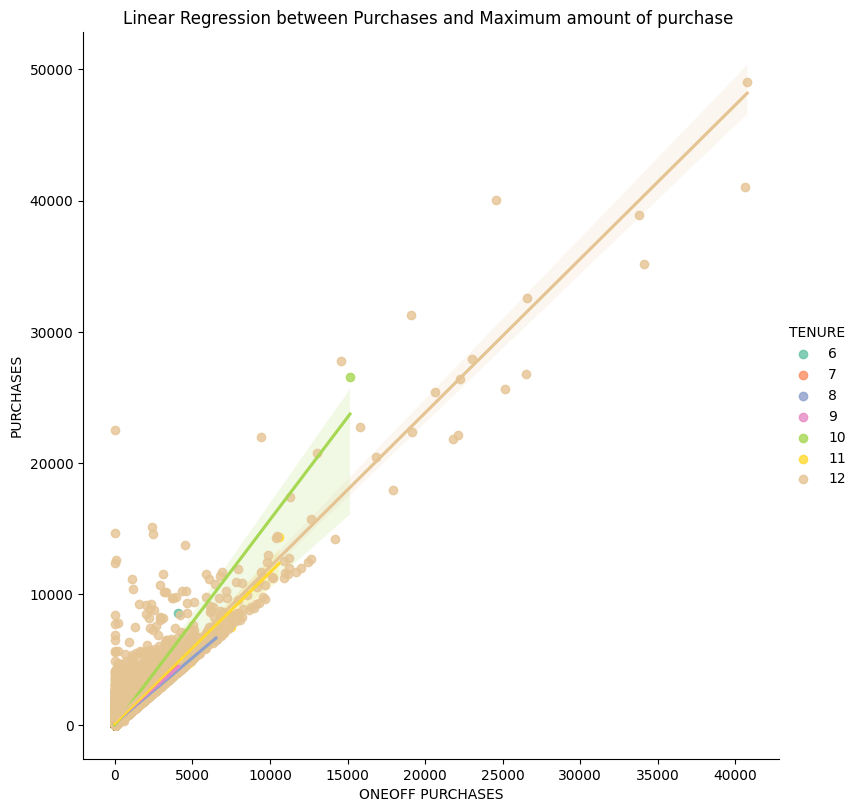

In [19]:
linear_plot = sns.lmplot(data=df, x = 'ONEOFF_PURCHASES', y = 'PURCHASES', hue = 'TENURE', palette="Set2", height=8)
linear_plot.set(xlabel='ONEOFF PURCHASES', ylabel='PURCHASES')
linear_plot.set(title='Linear Regression between Purchases and Maximum amount of purchase ')
plt.show()

From the above graph, we can see that customers who made more purchases in one go usually have higher overall purchase amounts as well.

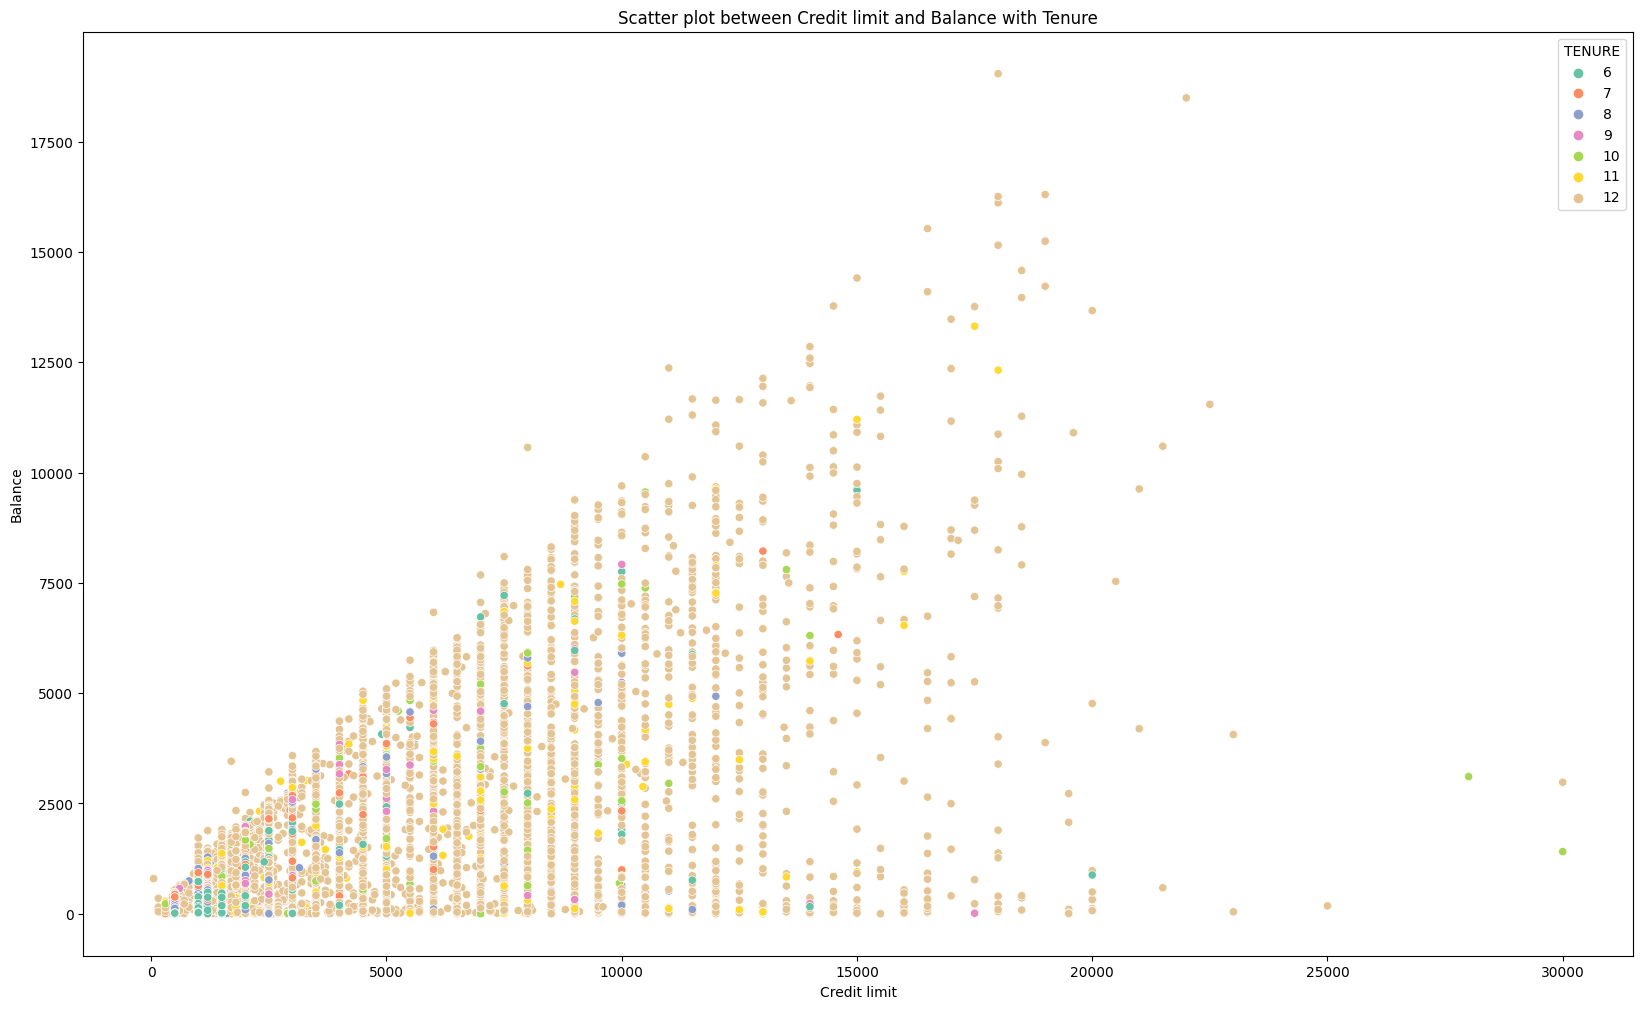

In [20]:
plt.subplots(figsize = (20,12))
scat_plot = sns.scatterplot(data=df, x= 'CREDIT_LIMIT', y = 'BALANCE', hue = 'TENURE',palette = 'Set2',legend = 'full')
scat_plot.set(xlabel='Credit limit', ylabel='Balance')
scat_plot.set(title='Scatter plot between Credit limit and Balance with Tenure')
plt.show()

From the above plot we can notice that as balance increases credit limit also increases and customers prefer tenure of 12 months mostly.

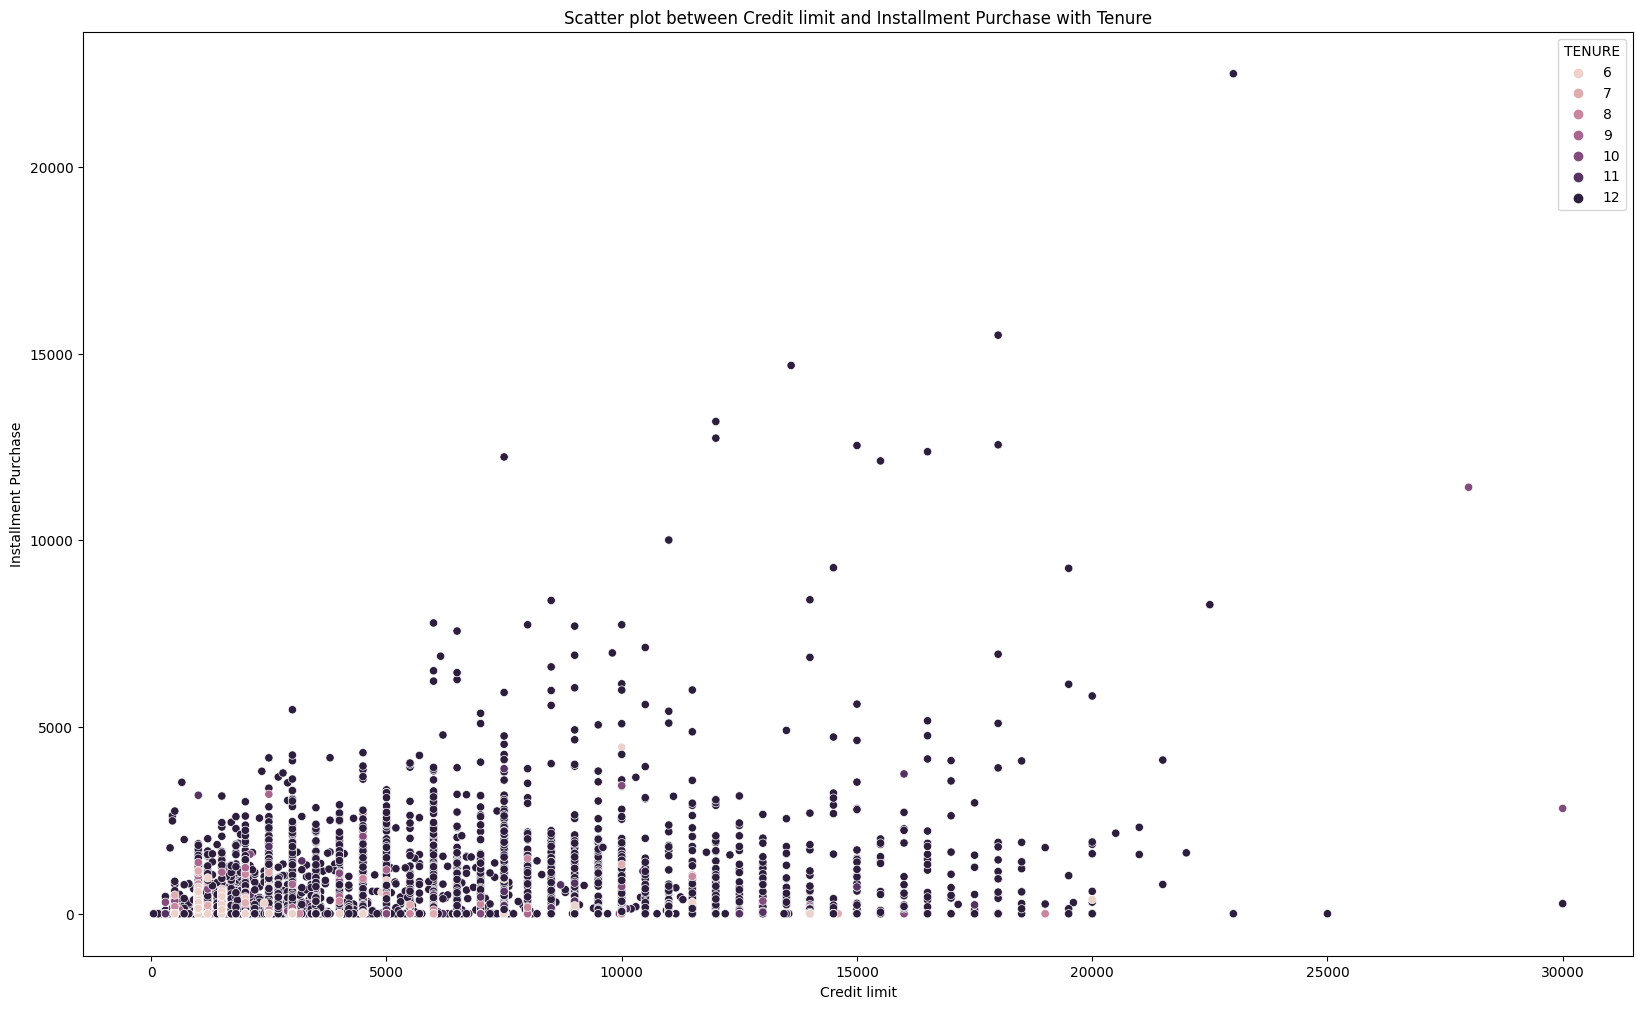

In [21]:
plt.subplots(figsize = (20,12))
scat_plot = sns.scatterplot(data=df, x = 'CREDIT_LIMIT', y = 'INSTALLMENTS_PURCHASES', hue = 'TENURE')
scat_plot.set(xlabel='Credit limit', ylabel='Installment Purchase')
scat_plot.set(title='Scatter plot between Credit limit and Installment Purchase with Tenure')
plt.show()

There is no relation between credit limit and installment purchase irrespective of the tenure

### Outlier Treatment

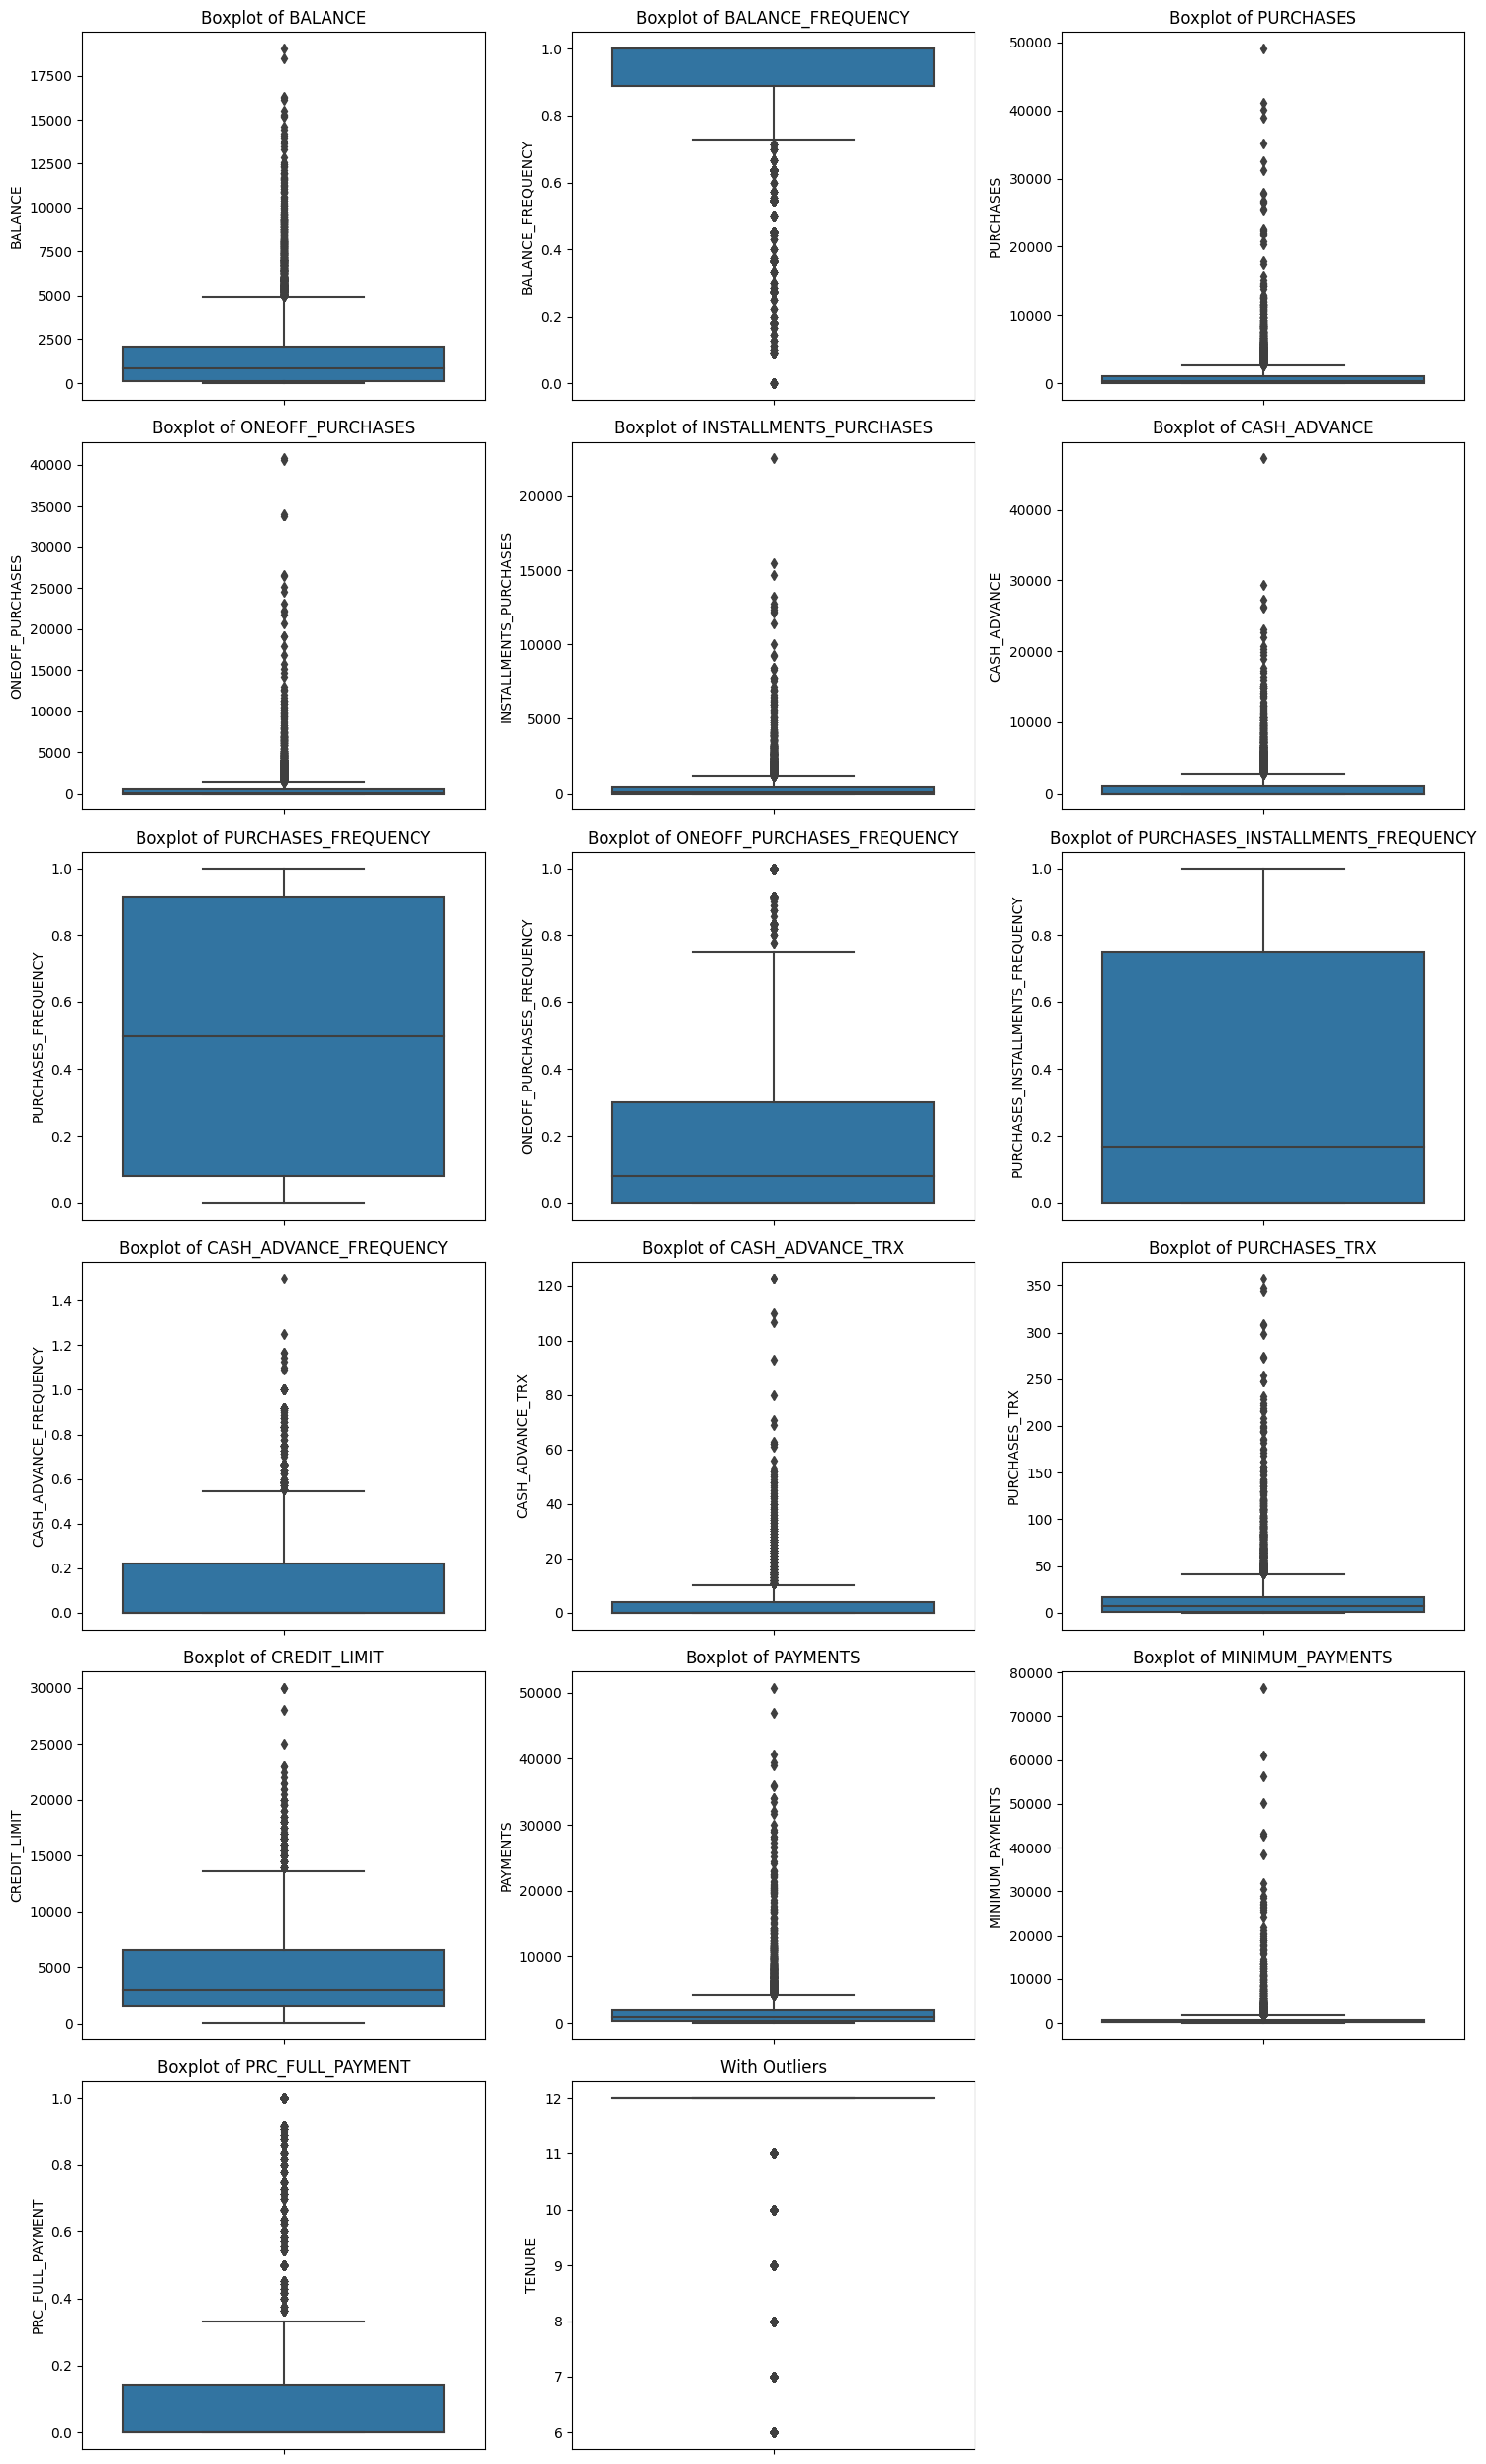

In [22]:
plt.figure(figsize = (15,25))
for i in range(len(cols)):
    plt.subplot(6, 3, i+1)
    sns.boxplot(y = df[cols[i]], data = df)
    plt.title('Boxplot of {}'.format(cols[i]))
    plt.tight_layout()
plt.title('With Outliers')
plt.show()

In [23]:
# Using flooring and capping method to treat outliers below 15 percent and above 85 percent, as we dont have to loose possible real data
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[15,85])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [24]:
for feature in df.columns: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

After Outliers Treatment


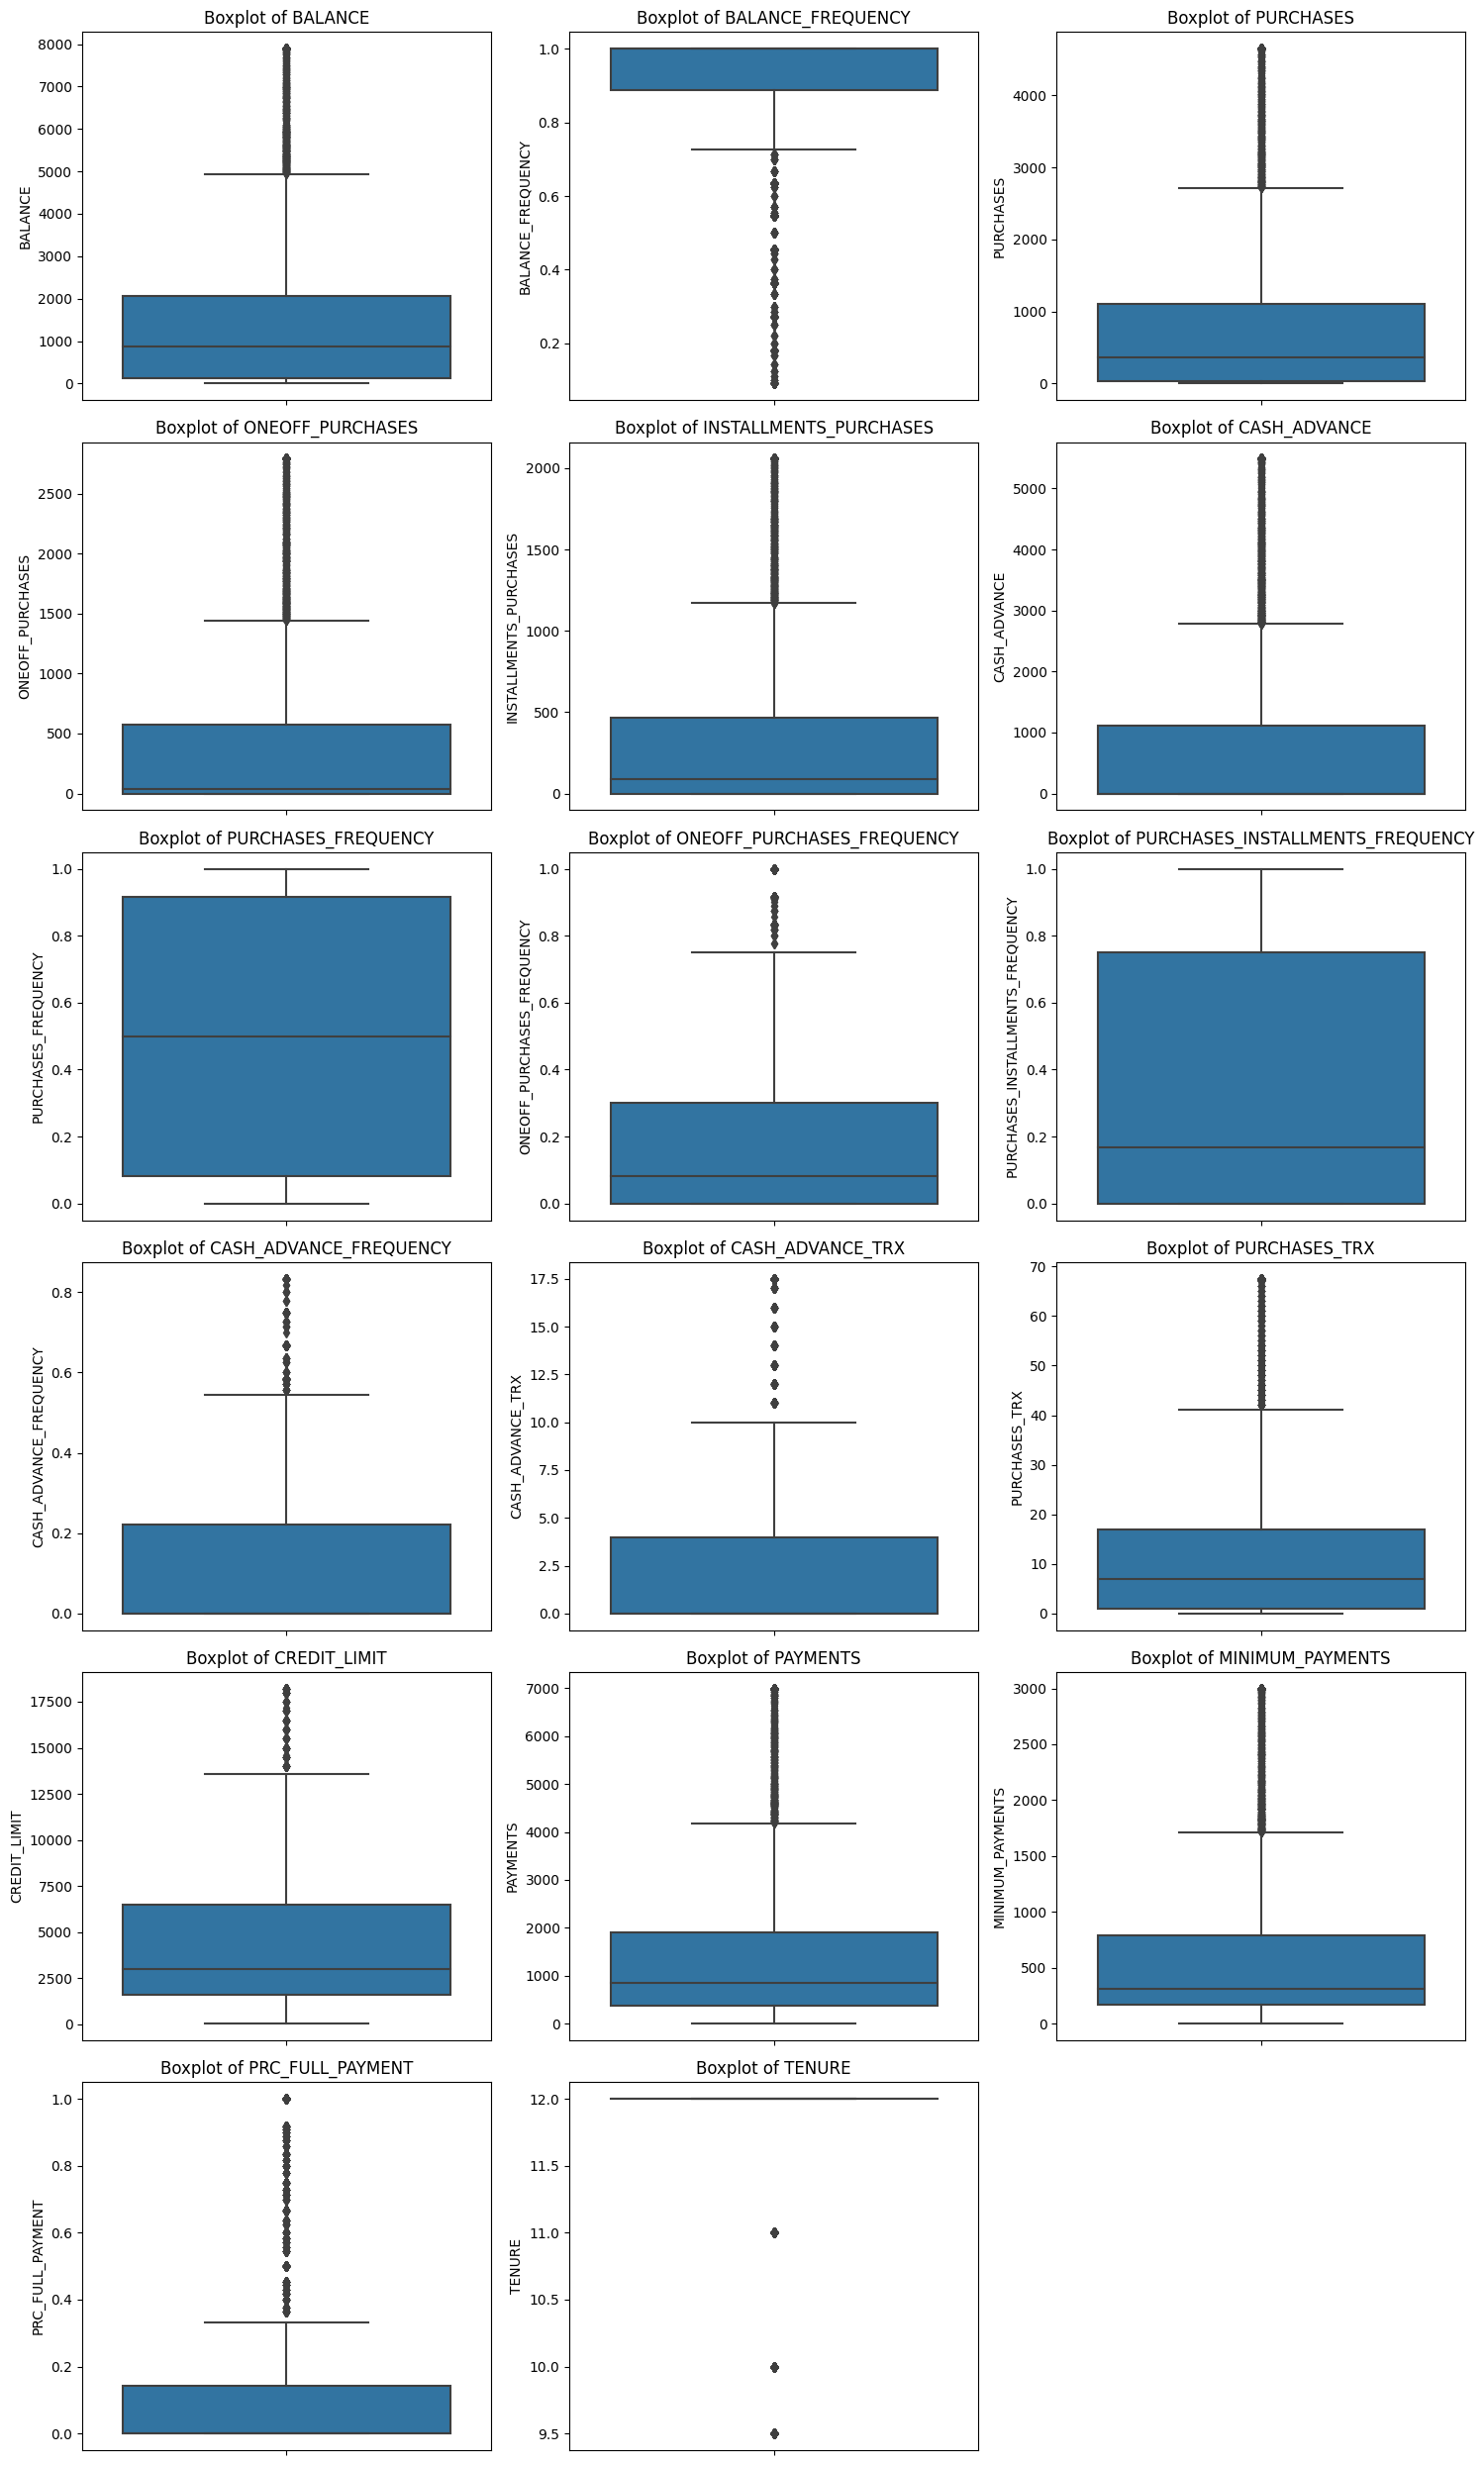

In [25]:
print('After Outliers Treatment')
plt.figure(figsize = (15,25))
for i in range(len(cols)):    
    plt.subplot(6, 3, i+1)
    sns.boxplot(y = df[cols[i]], data = df)
    plt.title('Boxplot of {}'.format(cols[i]))
    plt.tight_layout()
plt.show()

### Data Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_scaled = pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.783470,-0.255968,-0.638402,-0.594195,-0.472900,-0.585450,-0.806490,-0.678661,-0.707313,-0.685371,-0.615402,-0.652637,-0.971480,-0.763907,-0.667963,-0.525551,0.401278
1,0.892187,0.132501,-0.718903,-0.594195,-0.650411,3.179147,-1.221758,-0.678661,-0.916995,0.593147,0.252163,-0.769796,0.702259,1.502502,0.575232,0.234227,0.401278
2,0.517302,0.520970,-0.066481,0.418240,-0.650411,-0.585450,1.269843,2.673451,-0.916995,-0.685371,-0.615402,-0.066843,0.841737,-0.519755,-0.017899,-0.525551,0.401278
3,0.078201,-1.032907,0.545993,1.368686,-0.650411,-0.444256,-1.014125,-0.399319,-0.916995,-0.259200,-0.398511,-0.711216,0.841737,-0.881143,-0.437625,-0.525551,0.401278
4,-0.371753,0.520970,-0.705401,-0.573244,-0.650411,-0.585450,-1.014125,-0.399319,-0.916995,-0.685371,-0.615402,-0.711216,-0.915689,-0.487067,-0.527654,-0.525551,0.401278


### Clustering

#### KMeans Model

In [27]:
# Forming clusters with K = 1 to 11 and comparing the WSS
from sklearn.cluster import KMeans
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
wss

C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahan\anacondanew\lib\site-packages\skl

[152150.00000000003,
 120644.65191992307,
 99338.48002296833,
 87630.95595665553,
 80828.91311880256,
 75376.54113701191,
 71662.32662445134,
 67725.10342701996,
 64896.0725000632,
 62280.896690626025]

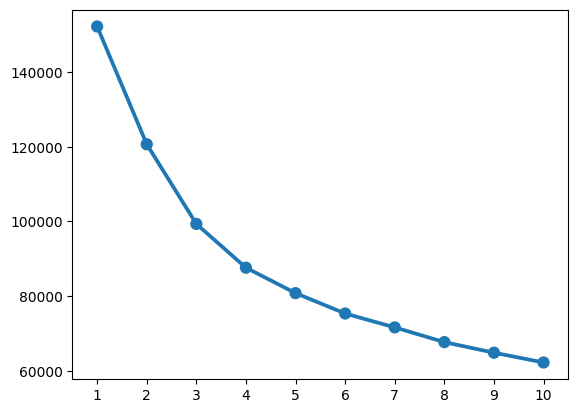

In [29]:
l=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(x=l,y=wss)
plt.show()

In [30]:
# Calculating silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state=1)
    k_means.fit(df_scaled)
    labels = k_means.labels_
    print("Silhouette score for {} clusters using KMeans: {}".format(i,silhouette_score(df_scaled,labels)))

C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters using KMeans: 0.27699914976070633


C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 3 clusters using KMeans: 0.24790699258186477


C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 clusters using KMeans: 0.19341073156620833


C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 5 clusters using KMeans: 0.18987929311639581


C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters using KMeans: 0.198522424118566


C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 7 clusters using KMeans: 0.1882202394594292


C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 8 clusters using KMeans: 0.19797978786672157


C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 9 clusters using KMeans: 0.19420925238082432


C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 10 clusters using KMeans: 0.1965671450199063


The highest value is 0.277 with clusters = 2  

Silhouette score for 2 clusters using KMeans is higher than other number of clusters.

#### Agglomerative Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering
for i in range(2,11):
    hac = AgglomerativeClustering(i)
    hac.fit(df_scaled)
    labels = hac.labels_
    print("Silhouette score for {} clusters using Agglomerative: {}".format(i,silhouette_score(df_scaled,labels)))

Silhouette score for 2 clusters using Agglomerative: 0.1794535815402288
Silhouette score for 3 clusters using Agglomerative: 0.15560749766982346
Silhouette score for 4 clusters using Agglomerative: 0.15752278436765624
Silhouette score for 5 clusters using Agglomerative: 0.1600374888998437
Silhouette score for 6 clusters using Agglomerative: 0.1287715552039928
Silhouette score for 7 clusters using Agglomerative: 0.12409984071102151
Silhouette score for 8 clusters using Agglomerative: 0.1339561091842131
Silhouette score for 9 clusters using Agglomerative: 0.13401674546121764
Silhouette score for 10 clusters using Agglomerative: 0.1370331970435262


The highest value is 0.179 with clusters = 2  

Silhouette score for 2 clusters using Agglomerative is higher than other number of clusters.

#### GaussianMixture

In [32]:
from sklearn.mixture import GaussianMixture
for i in range(2,11):
    gm = GaussianMixture(i)
    gm.fit(df_scaled)
    labels = gm.predict(df_scaled)
    print("Silhouette score for {} clusters using GaussianMixture: {}".format(i,silhouette_score(df_scaled,labels)))

Silhouette score for 2 clusters using GaussianMixture: 0.23218689302329867
Silhouette score for 3 clusters using GaussianMixture: 0.11725348913023248
Silhouette score for 4 clusters using GaussianMixture: 0.1139732961081819
Silhouette score for 5 clusters using GaussianMixture: 0.08045915400469432
Silhouette score for 6 clusters using GaussianMixture: 0.07719985674259854
Silhouette score for 7 clusters using GaussianMixture: 0.041363636437851785
Silhouette score for 8 clusters using GaussianMixture: 0.0052350633017495445
Silhouette score for 9 clusters using GaussianMixture: 0.050554453627619345
Silhouette score for 10 clusters using GaussianMixture: 0.020473183828647296


The highest value is 0.23 with clusters = 2

Silhouette score for 2 clusters using GaussianMixture is higher than other number of clusters.

In [33]:
from sklearn.cluster import DBSCAN
for i in np.arange(1,5,0.5):
    for j in range(2,4):
        db = DBSCAN(eps = i, min_samples = j).fit(df_scaled)        
        print("Silhouette score using DBSCAN with eps = {} , min_samples = {}: {}".format(i,j,silhouette_score(df_scaled,db.labels_)))
        print("Number of classes excluding noise = {} with noise mentioned as -1 class \n\n".format(len(np.unique(db.labels_))-1))

Silhouette score using DBSCAN with eps = 1.0 , min_samples = 2: -0.4550946257692455
Number of classes excluding noise = 296 with noise mentioned as -1 class 


Silhouette score using DBSCAN with eps = 1.0 , min_samples = 3: -0.42595918846875247
Number of classes excluding noise = 106 with noise mentioned as -1 class 


Silhouette score using DBSCAN with eps = 1.5 , min_samples = 2: -0.36807555691511407
Number of classes excluding noise = 133 with noise mentioned as -1 class 


Silhouette score using DBSCAN with eps = 1.5 , min_samples = 3: -0.23876303069461172
Number of classes excluding noise = 43 with noise mentioned as -1 class 


Silhouette score using DBSCAN with eps = 2.0 , min_samples = 2: -0.14466974325614174
Number of classes excluding noise = 48 with noise mentioned as -1 class 


Silhouette score using DBSCAN with eps = 2.0 , min_samples = 3: -0.052781304643632794
Number of classes excluding noise = 15 with noise mentioned as -1 class 


Silhouette score using DBSCAN with ep

In [34]:
db = DBSCAN(eps = 3, min_samples = 3).fit(df_scaled)
y_means = db.fit_predict(df_scaled)
np.unique(db.labels_)

array([-1,  0,  1], dtype=int64)

The highest value is 0.465 with eps = 4.5 , min_samples = 2 but it has only one class excluding noise. 

Hence we are considering the value 0.298 obtained from DBSCAN with eps = 3.0 , min_samples = 3 having two classes and noise.

The best algorithm with this data is DBSCAN that spilts the data into two clusters with silhouette_score = 0.298

#### Appending Clusters to the original dataset

In [35]:
df["cluster_group"] = db.labels_
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_group
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.00,0.00,0.0,5486.805032,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0


In [36]:
df["cluster_group"].unique()

array([ 0, -1,  1], dtype=int64)

#### Cluster Profiling

In [37]:
clust_profile=df.groupby('cluster_group').mean()
clust_profile['freq']=df["cluster_group"].value_counts().sort_index()
clust_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,freq
cluster_group,,,,,,,,,,,,,,,,,,
-1,3675.716637,0.879246,3081.856383,1671.049973,945.477048,3370.188730,0.702716,0.483957,0.442360,0.435567,11.446809,33.074468,9414.893617,5102.451811,1651.634037,0.249264,11.074468,47
0,1506.505019,0.878128,838.293817,447.590721,345.335863,840.548490,0.489138,0.201079,0.363878,0.132505,2.793695,13.036080,4447.817032,1494.103458,635.118129,0.153011,11.695853,8897
1,3336.670703,0.803030,3642.513333,82.798333,1934.287500,15.005201,0.625000,0.041667,0.583334,0.013889,0.166667,12.666667,17350.000000,6988.102202,1022.033477,0.449206,12.000000,6


In [38]:
clust_profile['freq']

cluster_group
-1      47
 0    8897
 1       6
Name: freq, dtype: int64

We can observe that there are only 6 data in one cluster and all other data are under one cluster with some noise.

In [39]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_
df["kmeans_cluster_group"] = labels
df.head()

C:\Users\sahan\anacondanew\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_group,kmeans_cluster_group
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0,1
1,3202.467416,0.909091,0.00,0.00,0.0,5486.805032,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0,1


In [41]:
clust_profile_kmeans=df.groupby('kmeans_cluster_group').mean()
clust_profile_kmeans['freq']=df["kmeans_cluster_group"].value_counts().sort_index()
clust_profile_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_group,freq
kmeans_cluster_group,,,,,,,,,,,,,,,,,,,
0,1986.625773,0.973180,2598.787908,1378.100209,1006.902518,590.187584,0.917662,0.538468,0.717019,0.083211,1.860974,37.327018,6789.484162,2842.723881,807.808953,0.263751,11.914616,-0.015748,2032
1,1381.805477,0.850151,338.864613,182.271055,156.471582,930.556179,0.364838,0.103763,0.260875,0.148940,3.124169,6.037005,3804.943092,1127.257500,591.635907,0.121394,11.627638,-0.001301,6918


In [42]:
clust_profile_kmeans['freq']

kmeans_cluster_group
0    2032
1    6918
Name: freq, dtype: int64

Even if the silhouette score is lesser for kmeans. we can observe the clustering has some definite number of data in both the clusters.